# Raw data overview / 原始数据展示

Minimal, direct views of the raw observations: table snapshot, single-frame scatter, and single-individual trajectory.


In [5]:
# Imports & data load（导入与数据读取）
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import swarm
from swarm import data

plt.style.use("ggplot")

# TODO: set your folder and range（修改数据路径与范围）
data_folder = "D:/3Ddataset/"  # change to your actual path
dfs = data.read_swarm_batch(data_folder, start=1, end=1)
df_raw = data.merge_dict_of_dfs(dfs)

df_raw.head(10)

,id,x,z,y,t,vx,vz,vy,ax,az,ay,source
0,1,-106.9000,-184.23,179.60,0.07,111.340,-53.522,162.15,2012.70,1152.30,940.430,df1
1,1,-106.1000,-184.75,181.29,0.08,138.450,-42.523,172.19,3654.20,1414.30,1013.000,df1
2,1,-105.0500,-185.19,182.91,0.09,174.870,-28.930,181.95,4419.90,1251.20,924.230,df1
3,1,-102.7100,-185.32,184.85,0.10,194.260,-18.158,190.78,1535.90,1076.00,954.190,df1
4,2,-263.7200,202.61,-128.77,0.07,-149.840,118.670,-320.22,2719.70,1612.40,-3793.500,df1
5,2,-264.8700,204.25,-132.23,0.08,-123.550,127.770,-354.76,2496.30,702.63,-3169.000,df1
6,2,-266.0800,205.48,-135.99,0.09,-100.770,129.740,-387.60,2194.40,-645.19,-2523.500,df1
7,2,-266.8900,206.91,-139.74,0.10,-74.226,119.290,-403.31,2426.10,-1594.70,-1693.000,df1
8,2,-267.5600,208.16,-144.15,0.11,-48.092,101.080,-418.47,2940.00,-2043.30,-991.850,df1
9,3,3.7507,-102.56,138.94,0.07,-148.020,59.461,110.62,-345.72,850.22,-82.376,df1


## Raw table snapshot / 原始表格截取

In [6]:
# Show a small slice of raw rows (no preprocessing)
# 只展示原始数据的若干行

df_raw.sample(10).sort_values(["t","id"]).head(10)

,id,x,z,y,t,vx,vz,vy,ax,az,ay,source
199284,811,-104.0400,-97.5430,143.610,19.58,142.2900,45.237,191.83000,-776.610,-1770.80,984.120,df1
115541,448,42.7350,-218.5300,175.030,21.35,-95.3610,76.291,-0.80588,454.980,965.55,992.010,df1
353058,1459,-305.1200,-58.3190,138.630,36.58,1.5646,-35.510,364.95000,-1112.700,-646.09,-352.920,df1
503561,2135,-131.6400,-75.4950,192.790,53.66,-122.4400,33.223,-71.78500,-315.290,2228.60,-3562.600,df1
632962,2675,-52.5030,-149.2800,77.488,74.11,-158.0800,161.250,43.00400,-55.433,-603.88,-837.160,df1
609593,2599,-8.5158,8.7846,102.510,76.22,214.1400,-24.567,124.04000,-947.270,1368.60,-1721.400,df1
698383,2972,53.8690,-195.0900,-261.790,77.34,12.2870,-76.428,-361.12000,-2804.500,1404.10,-1020.200,df1
752669,3225,80.1590,-184.5700,99.978,78.09,-30.2710,13.481,391.87000,-2538.500,-1022.20,-28.815,df1
751869,3215,115.8000,163.0700,-253.270,82.39,35.0320,216.400,-57.31200,-1523.000,245.92,88.074,df1
1015612,4473,-70.9550,86.6440,-36.535,105.20,321.6300,157.620,272.41000,-418.970,-1499.10,1129.400,df1


## Single-frame scatter (xy) / 单帧散点图

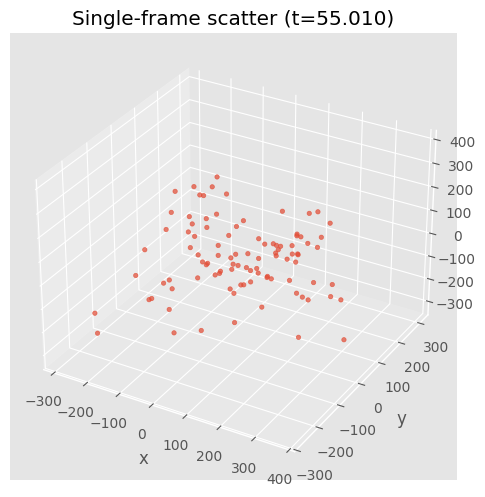

In [7]:
# Pick one time frame and plot 3D scatter
# 选一个时间点做 3D 散点

frames = np.sort(df_raw["t"].unique())
frame_t = frames[len(frames)//2]
frame = df_raw[df_raw["t"] == frame_t]

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(frame["x"], frame["y"], frame["z"], s=10, alpha=0.7)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title(f"Single-frame scatter (t={frame_t:.3f})")
plt.tight_layout()
plt.show()

## Single-individual raw trajectory / 单个个体原始轨迹

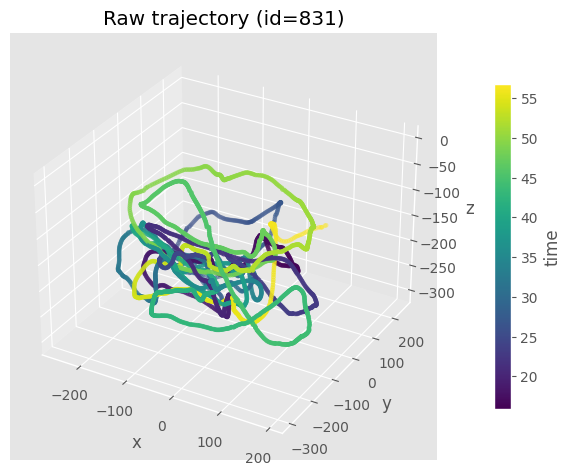

In [8]:
# Pick one id and plot its raw trajectory in 3D with time color
# 选一个个体，展示原始轨迹（3D + 时间色条）

id_counts = df_raw.groupby("id")["t"].count().sort_values(ascending=False)
example_id = id_counts.index[0]
traj = df_raw[df_raw["id"] == example_id].sort_values("t")

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(traj["x"], traj["y"], traj["z"], c=traj["t"], cmap="viridis", s=8)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title(f"Raw trajectory (id={example_id})")
cb = fig.colorbar(sc, ax=ax, shrink=0.7, pad=0.1)
cb.set_label("time")
plt.tight_layout()
plt.show()